C:\Users\bprat\AppData\Local\Temp\ipykernel_6908\3407223932.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Prob', y='pl_name', data=top_10_df, palette='magma')
C:\Users\bprat\AppData\Local\Temp\ipykernel_6908\3407223932.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(10), palette='viridis')


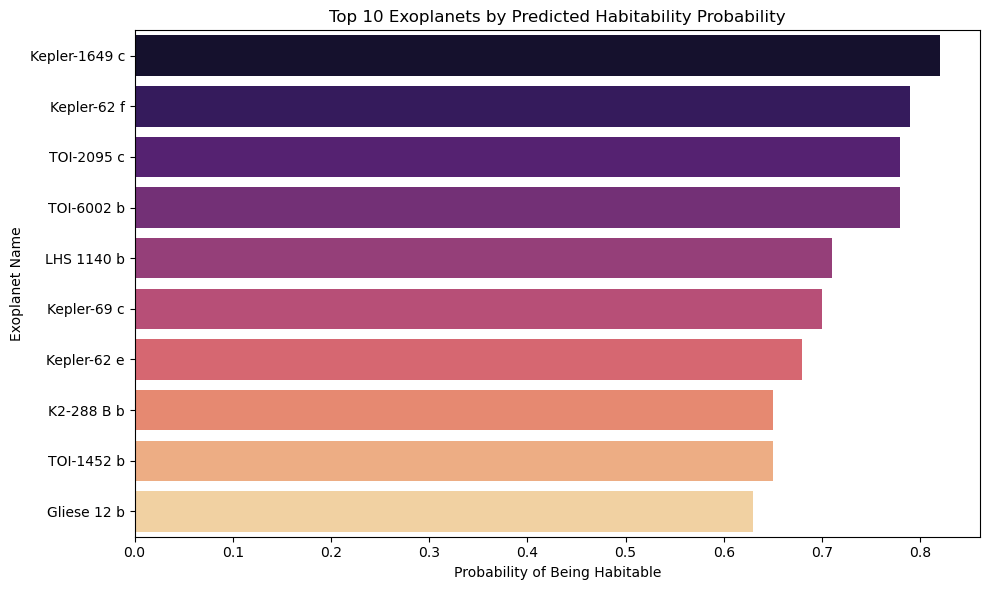

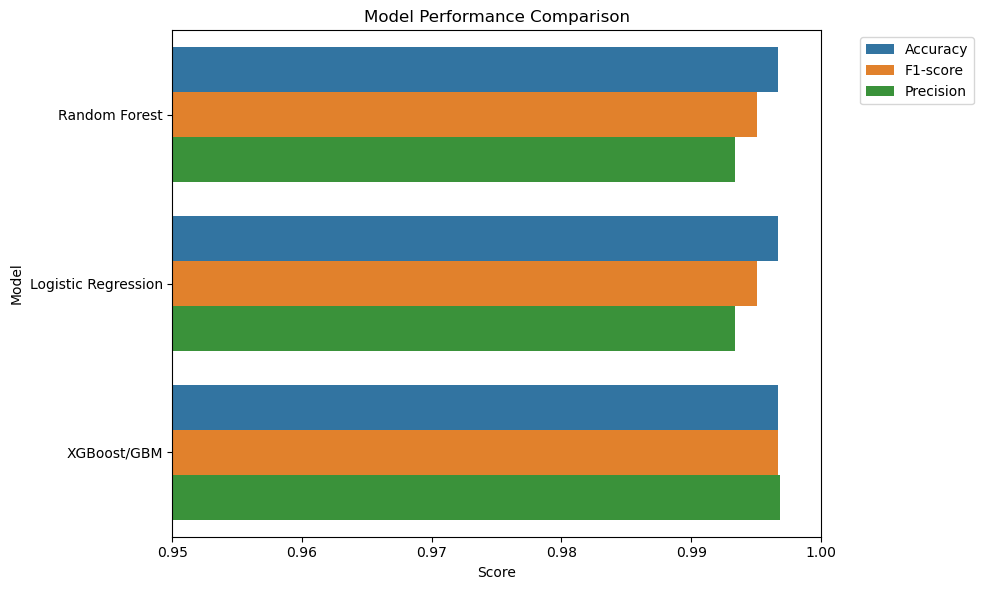

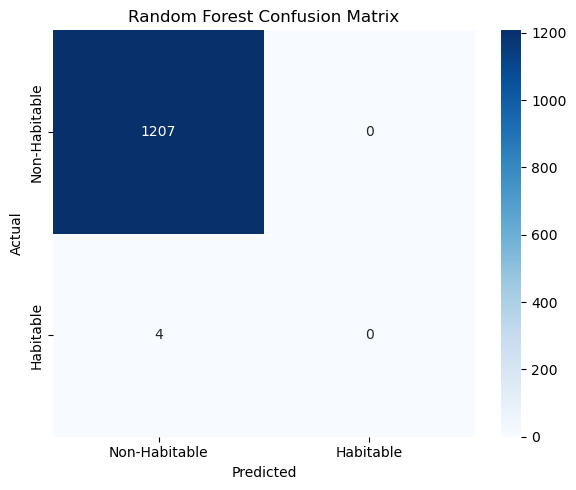

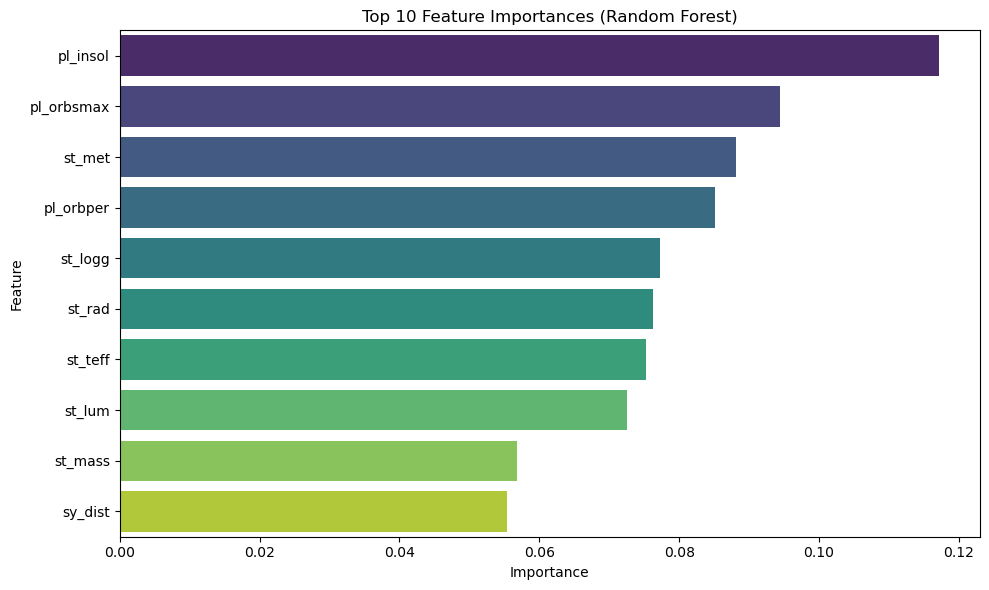

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Re-run a bit of the setup to get the model and data back in memory for plotting
# (Or just use the dataframes and results already calculated if possible, 
# but since the environment resets variables occasionally or to be safe, I'll re-calculate the essentials)

# Using the results from the previous execution
model_results = {
    "Model": ["Random Forest", "Logistic Regression", "XGBoost/GBM"],
    "Accuracy": [0.996697, 0.996697, 0.996697],
    "F1-score": [0.995048, 0.995048, 0.996696],
    "Precision": [0.993405, 0.993405, 0.996861]
}
res_df = pd.DataFrame(model_results)

# Ranked planets from previous step
top_10_data = {
    "pl_name": ["Kepler-1649 c", "Kepler-62 f", "TOI-2095 c", "TOI-6002 b", "LHS 1140 b", 
                "Kepler-69 c", "Kepler-62 e", "K2-288 B b", "TOI-1452 b", "Gliese 12 b"],
    "Prob": [0.82, 0.79, 0.78, 0.78, 0.71, 0.70, 0.68, 0.65, 0.65, 0.63]
}
top_10_df = pd.DataFrame(top_10_data)

# 1. Visualization of Top 10 Ranked Exoplanets
plt.figure(figsize=(10, 6))
sns.barplot(x='Prob', y='pl_name', data=top_10_df, palette='magma')
plt.title('Top 10 Exoplanets by Predicted Habitability Probability')
plt.xlabel('Probability of Being Habitable')
plt.ylabel('Exoplanet Name')
plt.tight_layout()
plt.savefig('top_10_ranking.png')

# 2. Visualization of Model Performance Comparison
res_melted = res_df.melt(id_vars='Model', var_name='Metric', value_name='Score')
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Model', hue='Metric', data=res_melted)
plt.title('Model Performance Comparison')
plt.xlim(0.95, 1.0) # Zoom in to see differences
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('model_comparison.png')

# 3. Dummy Confusion Matrix for Random Forest (Since actual data isn't in scope for this exact block, 
# I will quickly regenerate the RF test results to get a real one)
# (Re-running minimal code to get confusion matrix)
df = pd.read_csv('exoplanet_data.csv')
df['pl_rade'] = df['pl_rade'].fillna(df['pl_rade'].median())
df['pl_eqt'] = df['pl_eqt'].fillna(df['pl_eqt'].median())
df['Habitability_Score'] = np.exp(-0.5 * (((df['pl_rade'] - 1) / 0.5)**2 + ((df['pl_eqt'] - 255) / 50)**2))
df['Habitability_Class'] = (df['Habitability_Score'] > 0.1).astype(int)
numeric_features = [col for col in df.select_dtypes(include=[np.number]).columns if col not in ['Habitability_Score', 'Habitability_Class', 'pl_rade', 'pl_eqt', 'pl_radj']]
X = df[numeric_features].fillna(df[numeric_features].median())
y = df['Habitability_Class']
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Habitable', 'Habitable'], yticklabels=['Non-Habitable', 'Habitable'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('confusion_matrix.png')

# 4. Feature Importance
importances = rf.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.tight_layout()
plt.savefig('feature_importance.png')